<a href="https://colab.research.google.com/github/calderast/duke-BME503/blob/main/Exploration1_HH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install brian2

     |████████████████████████████████| 1.2MB 8.7MB/s 
     |████████████████████████████████| 5.9MB 15.8MB/s 
  Created wheel for brian2: filename=Brian2-2.4.2-cp37-cp37m-linux_x86_64.whl size=1257143 sha256=64e7a927b5ecdf48e9a56f32234de2bc746aa7ada8f9074c3fe118425c867eb3
  Stored in directory: /root/.cache/pip/wheels/5d/4b/cf/ef50e71df5479d67f981cbb17b1d842381019d27ba144d57de
Successfully built brian2
  Found existing installation: sympy 1.1.1
    Uninstalling sympy-1.1.1:
      Successfully uninstalled sympy-1.1.1


**Part 1: Classic	HH	model	with rest potential	of 0.0	mV**

Unmodified, template code

Starting simulation at t=0. s for a duration of 5. ms
5. ms (100%) simulated in < 1s
Starting simulation at t=5. ms for a duration of 1. ms
1. ms (100%) simulated in < 1s


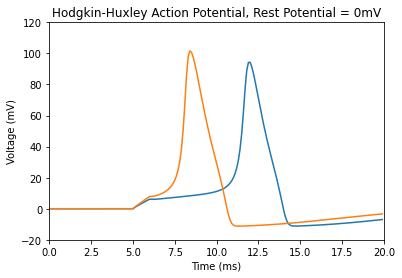

Script took 7.744990110397339 seconds.


In [ ]:
#@title
from brian2 import *
import time

start = time.time()
num_neurons = 2

# Parameters
area=20000*umetre**2
Cm = 1*ufarad*cm**-2
El = 10.613*mV
EK = -12.0*mV
ENa = 115.0*mV
E_rest = 0*mV

gl = 0.3*(msiemens)/(cm**2)
gNa = 120.0*(msiemens)/(cm**2)
gK = 36.0*(msiemens)/(cm**2)
defaultclock.dt=.1*ms
div=defaultclock.dt

# The model
eqs_ina = '''
    ina=gNa * m**3 * h * (ENa-(v)) :  amp/meter**2
    
    dm/dt = alpham * (1-m) - betam * m : 1
    dh/dt = alphah * (1-h) - betah * h : 1
    
    alpham = (0.1/mV) * (-v+25.0*mV) / (exp((-v+25.0*mV) / (10.0*mV)) - 1.0) /ms : Hz
    betam = 4.0*exp(-v/(18.0*mV))/ms : Hz
    alphah = 0.07*exp(-v/(20.0*mV))/ms : Hz
    betah = 1.0/(exp((-v+30.0*mV) / (10.0*mV))+1.0)/ms : Hz
    '''

eqs_ik = '''
    ik=gK * n**4 * (EK-v):amp/meter**2
    
    dn/dt = alphan * (1.0-n) - betan * n : 1
    
    alphan = (0.01/mV) * (-v+10.0*mV) / (exp((-v+10.0*mV) / (10.0*mV)) - 1.0)/ms : Hz
    betan = 0.125*exp(-v/(80.0*mV))/ms : Hz
    '''

eqs_il = '''
    il = gl * (El-v) :amp/meter**2
    '''

eqs = '''
    dv/dt = (ina+ik+il +I/area)/Cm :  volt
    I : amp
    '''
eqs += (eqs_ina+eqs_ik+eqs_il)

# Threshold and refractoriness are only used for spike counting
group = NeuronGroup(num_neurons, eqs,clock=Clock(defaultclock.dt),
                    threshold='v > -40*mV',
                    refractory='v > -40*mV',
                    method='exponential_euler')
group.v = 0*mV
group.m = 0.0529
group.n = 0.3177
group.h = 0.596

monitor2=StateMonitor(group,'v',record=True)
group.I = 0*nA
run(5.0*ms,report='text')
group.I[0] = 1.50*nA
group.I[1] = 1.90*nA
run(1*ms, report='text')
group.I = 0*nA
run(14.0*ms)


figure(1)
plot(monitor2.t/ms, monitor2.v[0]/mV) #plot the voltage for neuron 0 (index starts at 0)
plot(monitor2.t/ms, monitor2.v[1]/mV) #plot the voltage for neuron 0 (index starts at 0)
ylim(-20,120) #set axes limits
xlim(0,20)
xlabel('Time (ms)')
ylabel('Voltage (mV)')
title('Hodgkin-Huxley Action Potential, Rest Potential = 0mV')

#You can dump your results to a file to visualize separately
savetxt('Vmdata.dat',(monitor2.t/ms, monitor2.v[0]/mV))
#out=np.loadtxt('Vmdata.dat')
#plot(out[0],out[1])
show()
print('Script took', time.time()-start, 'seconds.')

**Hodgkin-Huxley Model Part 1.2:**
 
Shifting the Nernst potentials and all instances of v in the rate constant equations down by 60mV changes the resting membrane potential from 0mV to -60mV.

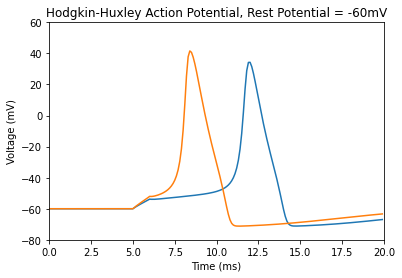

Script took 7.645868539810181 seconds.


In [ ]:
#@title
from brian2 import *
import time

start = time.time()
num_neurons = 2

# Parameters
area=20000*umetre**2
Cm = 1*ufarad*cm**-2
El = 10.613*mV - 60*mV
EK = -12.0*mV - 60*mV
ENa = 115.0*mV - 60*mV
E_rest = -60*mV - 60*mV

gl = 0.3*(msiemens)/(cm**2)
gNa = 120.0*(msiemens)/(cm**2)
gK = 36.0*(msiemens)/(cm**2)
defaultclock.dt=.1*ms
div=defaultclock.dt

# The model
eqs_ina = '''
    ina=gNa * m**3 * h * (ENa-(v)) :  amp/meter**2
    
    dm/dt = alpham * (1-m) - betam * m : 1
    dh/dt = alphah * (1-h) - betah * h : 1
    
    alpham = (0.1/mV) * (-v-60*mV+25.0*mV) / (exp((-v-60*mV+25.0*mV) / (10.0*mV)) - 1.0) /ms : Hz
    betam = 4.0*exp((-v-60*mV)/(18.0*mV))/ms : Hz
    alphah = 0.07*exp((-v-60*mV)/(20.0*mV))/ms : Hz
    betah = 1.0/(exp((-v-60*mV+30.0*mV) / (10.0*mV))+1.0)/ms : Hz
    '''

eqs_ik = '''
    ik=gK * n**4 * (EK-v):amp/meter**2
    
    dn/dt = alphan * (1.0-n) - betan * n : 1
    
    alphan = (0.01/mV) * (-v-60*mV+10.0*mV) / (exp((-v-60*mV+10.0*mV) / (10.0*mV)) - 1.0)/ms : Hz
    betan = 0.125*exp((-v-60*mV)/(80.0*mV))/ms : Hz
    '''

eqs_il = '''
    il = gl * (El-v) :amp/meter**2
    '''

eqs = '''
    dv/dt = (ina+ik+il +I/area)/Cm :  volt
    I : amp
    '''
eqs += (eqs_ina+eqs_ik+eqs_il)

# Threshold and refractoriness are only used for spike counting
group = NeuronGroup(num_neurons, eqs,clock=Clock(defaultclock.dt),
                    threshold='v > -40*mV',
                    refractory='v > -40*mV',
                    method='exponential_euler')
group.v = -60*mV
group.m = 0.0529
group.n = 0.3177
group.h = 0.596

monitor2=StateMonitor(group,'v',record=True)
net = Network(group, monitor2)
group.I = 0*nA
net.run(5.0*ms)
group.I[0] = 1.50*nA
group.I[1] = 1.90*nA
net.run(1*ms)
group.I = 0*nA
net.run(14.0*ms)


figure(1)
plot(monitor2.t/ms, monitor2.v[0]/mV) # plot the voltage for neuron 0 (index starts at 0)
plot(monitor2.t/ms, monitor2.v[1]/mV) # plot the voltage for neuron 0 (index starts at 0)
ylim(-20-60,120-60) # set axes limits
xlim(0,20)
xlabel('Time (ms)')
ylabel('Voltage (mV)')
title('Hodgkin-Huxley Action Potential, Rest Potential = -60mV')

show()
print('Script took', time.time()-start, 'seconds.')

**Hodgkin-Huxley Model, Part 1.3 and 1.4:** 

Part 1.3 (apply	a	1	msec	pulse and determine	the	threshold	current	in	nA) and Part 1.4 (apply	a 2000 msec pulse	with	amplitudes ranging	from	0.0-7 nA to determine	firing	rate	as	a	function	of	current	amplitude) are both included in this block (the simulation was reset in between parts). For a 1 msec current pulse, the threshold current was determined to be 1.52 nA. For a longer current pulse, the threshold current would decrease. 

When a longer (2000 ms) current pulse is applied, the firing rate jumps from 0 to about 60 Hz as currents exceeding the threshold current are applied, and then increases at a much slower rate as the stimulus current intensity is further increased.

The threshold current is 1.52nA


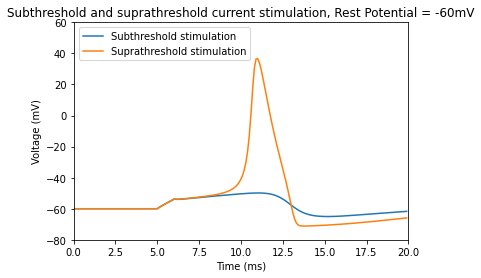

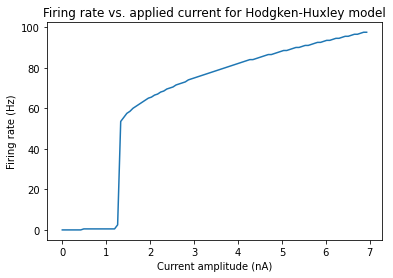

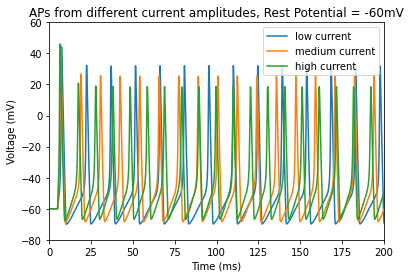

Script took 14.914066076278687 seconds.





In [ ]:
#@title
from brian2 import *
import time

start = time.time()
num_neurons = 100
duration = 2000*ms

# Parameters
area = 20000*umetre**2
Cm = 1*ufarad*cm**-2
defaultclock.dt=.1*ms
div=defaultclock.dt

El = 10.613*mV - 60*mV
EK = -12.0*mV - 60*mV
ENa = 115.0*mV - 60*mV
E_rest = -60*mV - 60*mV
gl = 0.3*(msiemens)/(cm**2)
gNa = 120.0*(msiemens)/(cm**2)
gK = 36.0*(msiemens)/(cm**2)

# The model
eqs_ina = '''
    ina=gNa * m**3 * h * (ENa-(v)) :  amp/meter**2
    dm/dt = alpham * (1-m) - betam * m : 1
    dh/dt = alphah * (1-h) - betah * h : 1
    alpham = (0.1/mV) * (-v-60*mV+25.0*mV) / (exp((-v-60*mV+25.0*mV) / (10.0*mV)) - 1.0) /ms : Hz
    betam = 4.0*exp((-v-60*mV)/(18.0*mV))/ms : Hz
    alphah = 0.07*exp((-v-60*mV)/(20.0*mV))/ms : Hz
    betah = 1.0/(exp((-v-60*mV+30.0*mV) / (10.0*mV))+1.0)/ms : Hz
    '''

eqs_ik = '''
    ik=gK * n**4 * (EK-v):amp/meter**2
    dn/dt = alphan * (1.0-n) - betan * n : 1
    alphan = (0.01/mV) * (-v-60*mV+10.0*mV) / (exp((-v-60*mV+10.0*mV) / (10.0*mV)) - 1.0)/ms : Hz
    betan = 0.125*exp((-v-60*mV)/(80.0*mV))/ms : Hz
    '''

eqs_il = '''
    il = gl * (El-v) :amp/meter**2
    '''

eqs = '''
    dv/dt = (ina+ik+il +I/area)/Cm :  volt
    I : amp
    '''

eqs += (eqs_ina+eqs_ik+eqs_il)

# Threshold and refractoriness used for spike counting
group_hh = NeuronGroup(num_neurons, eqs, clock = Clock(defaultclock.dt),
                    threshold = 'v > -40*mV',
                    refractory = 'v > -40*mV',
                    method = 'exponential_euler')
group_hh.v = -60*mV
group_hh.m = 0.0529
group_hh.n = 0.3177
group_hh.h = 0.596

spikemon_hh = SpikeMonitor(group_hh)
monitor_hh = StateMonitor(group_hh,'v', record=True)
network_hh = Network(group_hh, monitor_hh, spikemon_hh)
network_hh.store() # Store rest state of network 

# Part 1.3: Apply a 1ms current pulse with a variety of current amplitudes to determine threshold 
group_hh.I = 0*nA
network_hh.run(5.0*ms)
currents = numpy.linspace(0, 2, num_neurons)
group_hh.I = [curr for curr in currents]*nA
network_hh.run(1*ms)
group_hh.I = 0*nA
network_hh.run(14.0*ms)
spike_idx = min(spikemon_hh.i) # Get index of first neuron to spike
print('The threshold current is {:.3}nA'.format(currents[spike_idx]))

# Plot voltage vs time for neurons stimulated below/above threshold
figure(1)
plot(monitor_hh.t/ms, monitor_hh.v[spike_idx-1]/mV) # neuron just below threshold
plot(monitor_hh.t/ms, monitor_hh.v[spike_idx]/mV) # neuron at threshold
ylim(-80, 60) 
xlim(0, 20)
xlabel('Time (ms)')
ylabel('Voltage (mV)')
title('Subthreshold and suprathreshold current stimulation, Rest Potential = -60mV')
legend(['Subthreshold stimulation','Suprathreshold stimulation'])

network_hh.stop()
network_hh.restore() # restore rest state of network before new current pulse

# Part 1.4: After 5ms, apply a 2000 msec current pulse	with amplitudes 0-7 nA
group_hh.I = 0*nA
network_hh.run(5.0*ms)
group_hh.I	=	'(7.0*nA*i) /	num_neurons'
network_hh.run(duration)

# Plot firing rate as a function of current amplitude
figure(2)
plot(group_hh.I/nA, spikemon_hh.count/(duration)/Hz) 
xlabel('Current amplitude (nA)')
ylabel('Firing rate (Hz)')
title('Firing rate vs. applied current for Hodgken-Huxley model')

# Plot voltage vs time for neurons at various stimulus currents
figure(3)
plot(monitor_hh.t/ms, monitor_hh.v[int(num_neurons/3)]/mV) # 1/3 max current (low)
plot(monitor_hh.t/ms, monitor_hh.v[int(num_neurons*2/3)]/mV) # 2/3 max current (medium)
plot(monitor_hh.t/ms, monitor_hh.v[num_neurons-1]/mV) # max current
ylim(-80,60)
xlim(0,200)
xlabel('Time (ms)')
ylabel('Voltage (mV)')
title('APs from different current amplitudes, Rest Potential = -60mV')
legend(['low current','medium current','high current'])

show()
print('Script took', time.time()-start, 'seconds.')
print('\n\n');

**Part	2:	Connor	Stevens	Model**

With the A-current, the membrane potential is slower to rise, limiting the rate at which action potentials can fire. Once the threshold current is exceeded, the firing rate rises continuously from 0 as the current amplitude is increased.

Without the A-current, the membrane potential rises much more quickly between action potentials, leading to a faster firing rate for the same amount of stimulus current. Once the threshold current is exceeded, the firing rate sharply rises (to about 80 Hz) and then rises more slowly as the stimulus current is further increased.


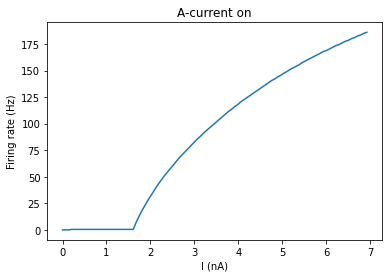

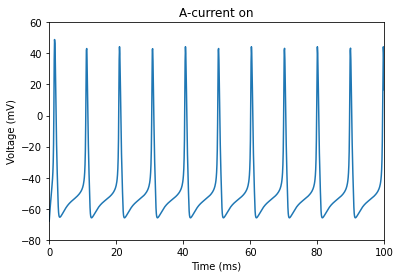

In [ ]:
#@title
from brian2 import *

num_neurons = 100
duration = 2*second
include_A_current = True

# Parameters
area = 20000*umetre**2
Cm = 1*ufarad*cm**-2
El = -17.0*mV if include_A_current else -70*mV
EK = -72*mV
ENa = 55.0*mV
EA= -75.0*mV 

gl = 0.3*msiemens/cm**2
gNa = 120.0*msiemens/cm**2
gK = 20*msiemens/cm**2
gA=  47.7*msiemens/cm**2 if include_A_current else 0*msiemens/cm**2

# The model
eqs_ina = '''
ina=gNa * m**3 * h * (ENa-v) :  amp/meter**2
dm/dt = alpham * (1-m) - betam * m : 1
dh/dt = alphah * (1-h) - betah * h : 1
alpham = 0.38/mV*(v+29.7*mV)/(1-exp(-0.1*(v+29.7*mV)/mV ) )/ms : Hz
betam = 15.2*exp(-0.0556*(v+54.7*mV)/mV)/ms : Hz
alphah = 0.266*exp(-0.05*(v+48*mV)/mV)/ms : Hz
betah = 3.8/(1+exp(-0.1*(v+18.*mV)/mV))/ms : Hz
'''

# (added a_inf, tau_a, b_inf, tau_b, da/dt, db/dt)
eqs_iA = '''
iA=gA * a**3 * b * (EA-v) : amp/meter**2
da/dt = (a_inf - a)/tau_a : 1
db/dt = (b_inf - b)/tau_b : 1
a_inf = ( (0.0761*exp(0.0314*(v+94.22*mV)/mV))/(1+exp(0.0346*(v+1.17*mV)/mV)) )**(1.0/3.0) : 1
tau_a = (0.3632 + 1.158/(1+exp(0.0497*(v+55.96*mV)/mV)) )*ms : second
b_inf = ( 1.0/(1+exp(0.0688*(v+53.3*mV)/mV)) )**4.0 : 1
tau_b = (1.24 + 2.678/(1+exp(0.0624*(v+50*mV)/mV)) )*ms : second
'''

eqs_ik = '''
ik=gK * n**4 * (EK-v):amp/meter**2
dn/dt = alphan * (1-n) - betan * n : 1
alphan = (0.02*(v+45.7*mV)/mV)/(1-exp(-0.1*(v+45.7*mV)/mV))/ms : Hz
betan = 0.25*exp(-0.0125*(v+55.7*mV)/mV)/ms : Hz
'''

eqs_il = '''
il = gl * (El-v) :amp/meter**2
'''

eqs = '''
dv/dt = (ina+ik+il+iA+I/area)/Cm:  volt
I : amp
'''
eqs += (eqs_ina+eqs_ik+eqs_il+eqs_iA) 

# Threshold and refractoriness are used for spike counting
group_cs = NeuronGroup(num_neurons, eqs, threshold='v > -40*mV',
                   refractory='v > -40*mV', method='exponential_euler')
group_cs.v = -68.0*mV
group_cs.m = 0.0529
group_cs.n = 0.3177
group_cs.h = 0.596
group_cs.I = '(7.0*nA*i) / num_neurons'

monitor_cs = StateMonitor(group_cs,'v', record=True)
spikemon_cs = SpikeMonitor(group_cs)
network_cs = Network(group_cs, monitor_cs, spikemon_cs)
network_cs.run(duration)

# Firing rate vs. I plot, voltage vs time plot (Fig 6.1 in Connor Stevens pdf)
figure(1)
plot(group_cs.I/nA, spikemon_cs.count / duration)
xlabel('I (nA)')
ylabel('Firing rate (Hz)')
title('A-current on' if include_A_current else 'A-current off')

figure(2)
plot(monitor_cs.t/ms, monitor_cs.v[int(num_neurons/2)]/mV) # use neuron with average stimulatiom
ylim(-80,60)
xlim(0,100)
xlabel('Time (ms)')
ylabel('Voltage (mV)')
title('A-current on' if include_A_current else 'A-current off')

show()
print('\n\n');

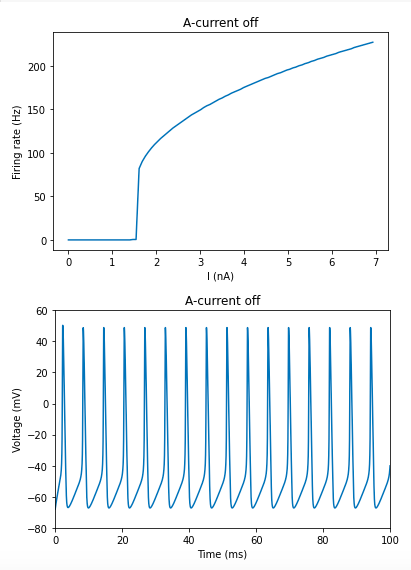

**Part 3: Pyramidal Neuron** 

The firing rate increases (roughly) linearly from 0 as the applied current increases. The threshold current (for an applied stimulus of 2 seconds) is VERY low (about .1 nA) compared to Hodgkin-Huxley or Connor Stevens (about 1.5 nA). The model falls apart at higher currents (>8 nA) and the action potentials lose their shape. The voltage vs. time plots show that the pyramidal neuron incorporates a slight spike-rate adaptation, as action potential spikes get slightly farther apart as time goes on.

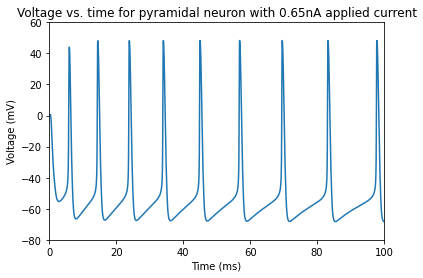

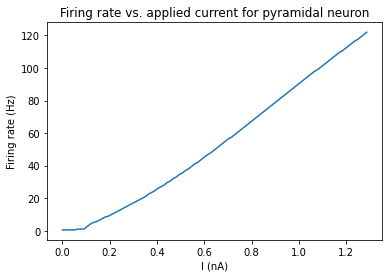

In [ ]:
#@title
from brian2 import *

num_neurons = 100
duration = 2.0*second

# Parameters
area = 20000*umetre**2
Cm = (1*ufarad*cm**-2)
defaultclock.dt = .02*ms
div = defaultclock.dt

# The model
ENa = 50.0 *mV
gnabar = 50*msiemens*cm**-2
VT1 = -61.5
VT = -61.5
EK = -90.0*mV
gkbar = 4.8*msiemens*cm**-2
EKm = -90.0*mV
glbar = 0.0205*msiemens/cm**2
El = -70*mV
gmbar = 0.15*msiemens*cm**-2 # added for IM current
taupbar = 1123.5*ms # added for IM current

# Na channel
eqs_na = """
ina = gnabar*m**3*h*(ENa-v) : amp/meter**2
dm/dt  = (am1*(1-m)-bm1*m): 1
dh/dt  = (ah1*(1-h)-bh1*h): 1
am1 = 0.32*(13-(vu-VT))/(exp((13-(vu-VT))/4.0)-1.0)/ms: Hz
bm1 = (0.28*((vu-VT)-40)/(exp(((vu-VT)-40)/5.0)-1.0))/ms: Hz
ah1 = 0.128*exp(-(vu-17-VT)/18)/ms: Hz
bh1 = 4.0/(1+exp(-(vu-40-VT)/5))/ms: Hz
"""

# IM channel (slow non-inactivating potassium current)
eqs_m = """
im = gmbar*p*(EKm-v) : amp/meter**2
dp/dt = (pinf-p)/taup : 1
pinf = 1.0/(1.0+exp((vu+35.0)/-10.0)) :1
taup = taupbar/(3.3*exp((vu+35.0)/20.0)+exp((vu+35.0)/-20.0)) : second
"""

# K channel 
eqs_k = """
ik = gkbar*b**4*(EK-v): amp/meter**2
db/dt  = (ab*(1-b)-bb*b): 1
ab=0.032*(vu-15-VT1)/(1.0 - exp(-(vu-15-VT1)/5.0))/ms:Hz
bb=0.5*exp(-(vu-10-VT1)/40)/ms : Hz
"""

# Leak
eqs_leak = """
il = glbar*(El-v) : amp/meter**2
"""

eqs = """
dv/dt = (il + ik + + ina + im + I/area)/Cm : volt
vu = v/mV : 1  # unitless v 
I: amp
"""
eqs += (eqs_leak + eqs_k + eqs_na + eqs_m)

# Threshold and refractoriness used for spike counting
group_pyr = NeuronGroup(num_neurons, eqs, clock = Clock(defaultclock.dt),
                    threshold='v > -40*mV', refractory='v > -40*mV', method='euler')

group_pyr.I = '(1.3*nA*i)/ num_neurons'

# Set up monitors and run simulation
spikemon_pyr = SpikeMonitor(group_pyr)
monitor_pyr = StateMonitor(group_pyr, ('v'), record=True)
network_pyr = Network(group_pyr, spikemon_pyr, monitor_pyr)
network_pyr.run(duration)

# Voltage vs. time plot
figure(1)
plot(monitor_pyr.t/ms, monitor_pyr.v[int(num_neurons/2)]/mV) # plot neuron with medium stimulus
ylim(-80,60)
xlim(0,100)
xlabel('Time (ms)')
ylabel('Voltage (mV)')
title('Voltage vs. time for pyramidal neuron with {:}nA applied current'.format(group_pyr.I[int(num_neurons/2)]/nA))

# Firing rate vs. I plot
figure(2)
plot(group_pyr.I/nA, spikemon_pyr.count / duration)
xlabel('I (nA)')
ylabel('Firing rate (Hz)')
title('Firing rate vs. applied current for pyramidal neuron')

show()
print('\n\n');

**Part 4: Linear Integrate and Fire Neuron**

When the refractory period is removed (t_ref is set to 0ms), the firing rate increases linearly as the stimulus current is increased. When the refractory period is included, the firing rate vs. I plot looks similar to the Connor Stevens model with the A-current included. The maximal firing rate with the refractory period approaches 1/t_ref. This model is the simplest but does a poor job of replicating the shape of a biological action potential, and when no refractory period is included, the firing rate increases beyond what would be biologically possible (>2000 Hz).

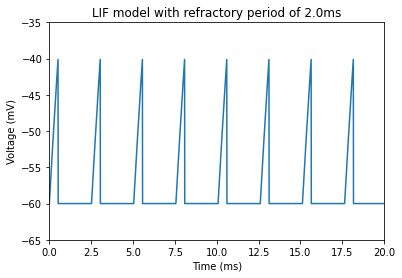

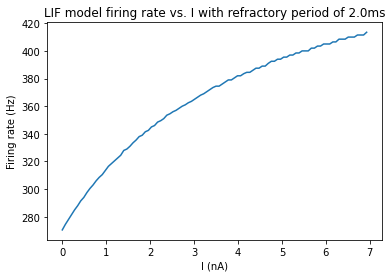

In [ ]:
#@title
from brian2 import *

num_neurons = 100
duration = 2*second

# Parameters
area = 20000*umetre**2
Cm = 1*ufarad*cm**-2
defaultclock.dt = .01*ms
div=defaultclock.dt

# The model (leakage current only)
El = -10.0*mV
E_rest = -60*mV
gl = 0.3*(msiemens)/(cm**2)

t_ref = 2.0*ms # option to include refractory period

eqs = '''
    il = gl*(El-v) : amp/meter**2
    dv/dt = (il + I/area)/Cm :  volt (unless refractory)
    I : amp
    '''

group_lif = NeuronGroup(num_neurons, eqs, clock = Clock(defaultclock.dt),
                    threshold = 'v >= -40*mV', refractory = t_ref,
                    reset = 'v = E_rest',  method ='euler')
group_lif.v = -60*mV
group_lif.I = '(7.0*nA*i) / num_neurons'

# Set up monitors and run simulation
spikemon_lif = SpikeMonitor(group_lif)
monitor_lif = StateMonitor(group_lif, 'v', record=True)
network_lif = Network(group_lif, monitor_lif, spikemon_lif)
network_lif.run(duration)

# Voltage vs. time plot
figure(1)
plot(monitor_lif.t/ms, monitor_lif.v[75]/mV) # show output from neuron 75
ylim(-65,-35)
xlim(0,20)
xlabel('Time (ms)')
ylabel('Voltage (mV)')
title('LIF model with refractory period of {:}ms'.format(t_ref/ms))

# Firing rate vs. I plot
figure(2)
plot(group_lif.I/nA, spikemon_lif.count / duration)
xlabel('I (nA)')
ylabel('Firing rate (Hz)')
title('LIF model firing rate vs. I with refractory period of {:}ms'.format(t_ref/ms))

show()

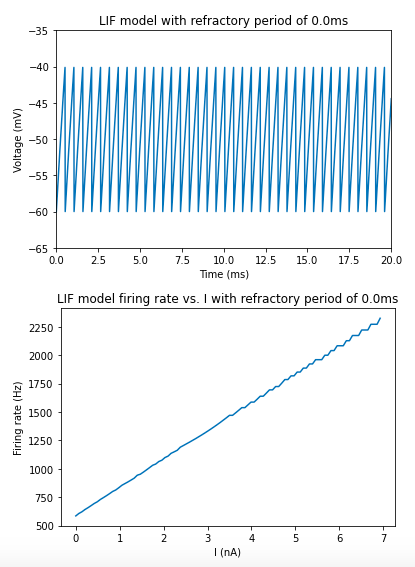
    











    